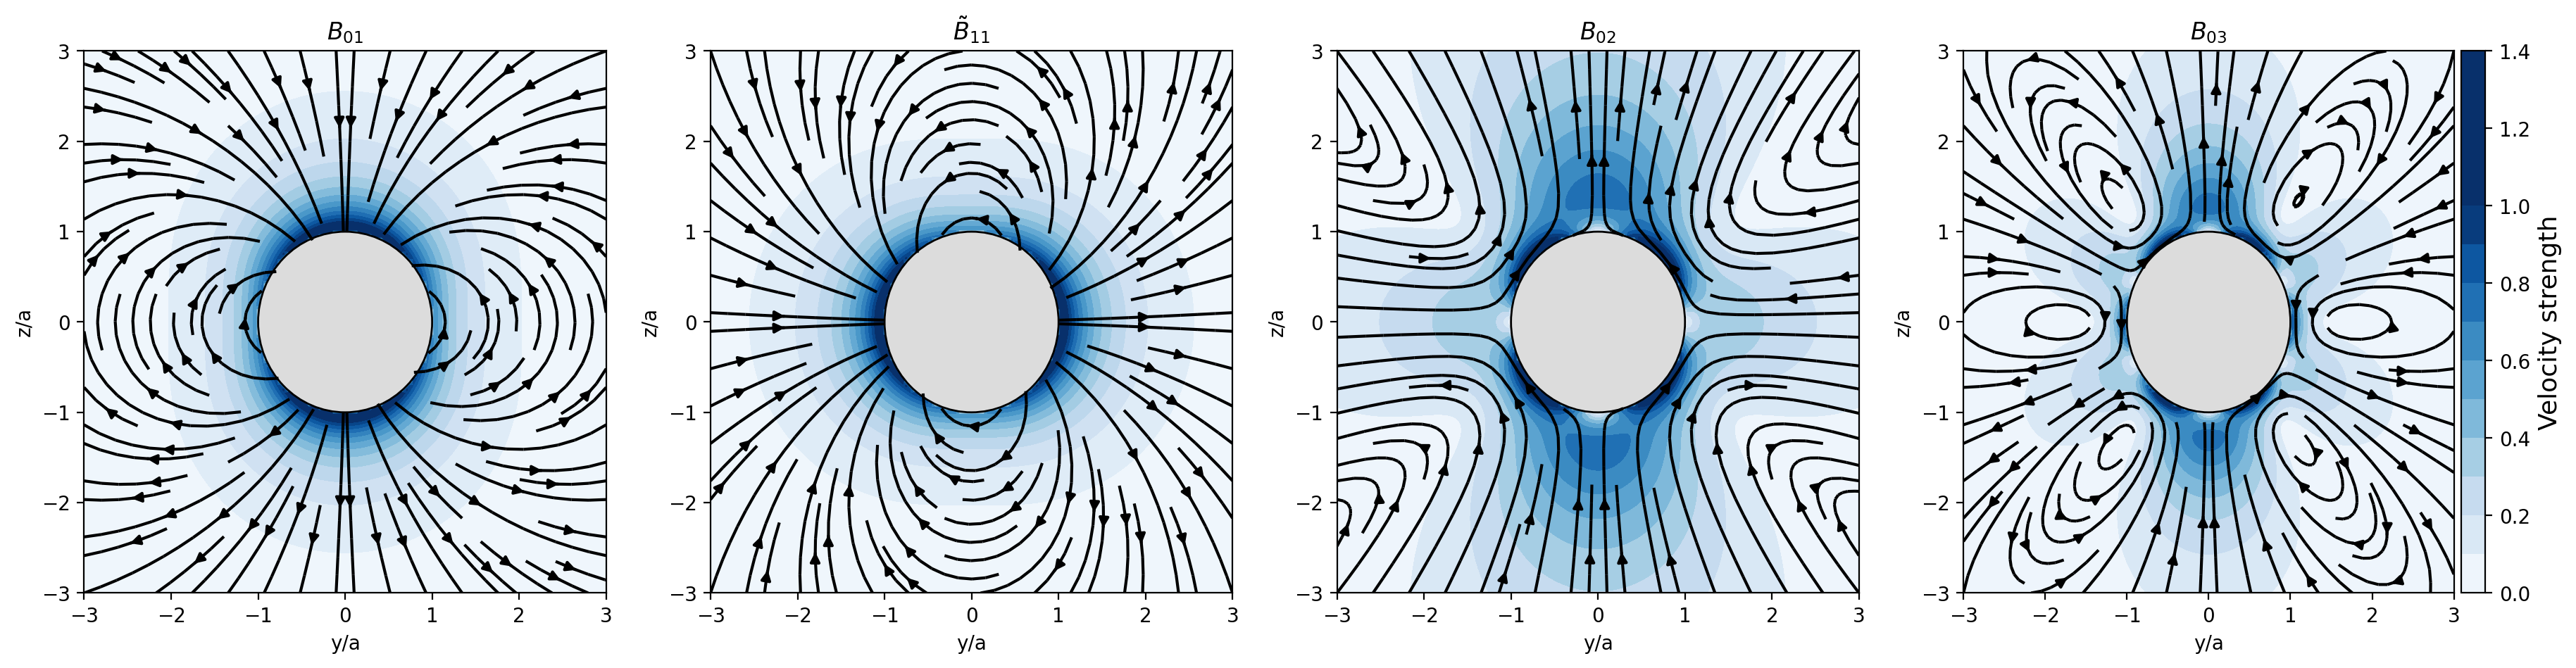

In [1]:
import numpy as np
import field_velocity
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable


def generate_velocity_field(mode_array, max_length):
    # Coordinates
    N_points = 150
    z = np.linspace(-max_length, max_length, N_points)
    y = np.linspace(-max_length, max_length, N_points)
    Y, Z = np.meshgrid(y, z)
    R = np.sqrt(Z**2 + Y**2)
    Theta = np.arctan(Y/Z)
    phi = np.pi / 2

    # Loop through each 
    u_y = np.empty((N_points, N_points))
    u_z = np.empty_like(u_y)
    for i in range(N_points):
        for j in range(N_points):
            _, u_y_val, u_z_val = field_velocity.field_cartesian(max_mode, R[i,j], np.array([Theta[i,j]]), 
                                                                 np.array([phi]), a, mode_array)
            #print(u_y_val)
            u_y[i, j] = u_y_val
            u_z[i, j] = u_z_val

    # Remove velocity values inside squirmer
    #R = R.flatten()
    u_y[np.where(R<a)] = 0
    u_z[np.where(R<a)] = 0
    velocity_magnitude = np.sqrt(u_y ** 2 + u_z ** 2)
    return Y, Z, u_y, u_z, velocity_magnitude


def generate_velocity_field_xy(mode_array, max_length):
    # Coordinates
    N_points = 100
    x = np.linspace(-max_length, max_length, N_points)
    y = np.linspace(-max_length, max_length, N_points)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    theta = np.pi / 2
    Phi = np.arctan2(Y, X)

    # Loop through each 
    u_x = np.empty((N_points, N_points))
    u_y = np.empty_like(u_x)
    for i in range(N_points):
        for j in range(N_points):
            u_x_val, u_y_val, _ = field_velocity.field_cartesian(max_mode, R[i,j], np.array([theta]), 
                                                                 np.array([Phi[i, j]]), a, mode_array)
            #print(u_y_val)
            u_x[i, j] = u_x_val
            u_y[i, j] = u_y_val

    # Remove velocity values inside squirmer
    #R = R.flatten()
    u_x[np.where(R<a)] = 0
    u_y[np.where(R<a)] = 0
    velocity_magnitude = np.sqrt(u_x ** 2 + u_y ** 2)
    return X, Y, u_x, u_y, velocity_magnitude




def plot_velocity_field(mode_array_list, max_length, title_list, plane):
    # NOTE SØRG FOR AT ALLES FARVER SKALERER ENS!!!!
    def fill_axis(axis, mode_array, title):
        if plane == "xy":
            x1, x2, u_1, u_2, velocity_magnitude = generate_velocity_field_xy(mode_array, max_length)
            xlabel = "x"
            ylabel = "y"
        else:
            x1, x2, u_1, u_2, velocity_magnitude = generate_velocity_field(mode_array, max_length)
            xlabel = "y"
            ylabel = "z"

        axis.set(xlim=(-max_length, max_length), ylim=(-max_length, max_length), title=title, xlabel="y")
        axis.streamplot(x1, x2, u_1, u_2, density=1, color="k")
        contour = axis.contourf(x1, x2, velocity_magnitude, vmin=0, vmax=1,levels=16, cmap='Blues')
        circle1 = plt.Circle((0, 0), a, facecolor="gainsboro", edgecolor="k")
        axis.add_patch(circle1)
        return contour


    # -- Plot counterf and streamplot -- 
    fig, ax = plt.subplots(nrows=1, ncols=4, dpi=200, figsize=(22, 5))
    ax0 = ax[0]
    ax1 = ax[1]
    ax2 = ax[2]
    ax3 = ax[3]

    # Plot on each axis  
    fill_axis(ax0, mode_array_list[0], title_list[0])
    fill_axis(ax1, mode_array_list[1], title_list[1])
    fill_axis(ax2, mode_array_list[2], title_list[2])
    contour_ax3 = fill_axis(ax3, mode_array_list[3], title_list[3])
    
    # Remove unnecessary ticks
    ax0.set(ylabel="z/a")
    ax1.set(ylabel="z/a")
    ax2.set(ylabel="z/a")
    ax3.set(ylabel="z/a")
    
    ax0.set(xlabel="y/a")
    ax1.set(xlabel="y/a")
    ax2.set(xlabel="y/a")
    ax3.set(xlabel="y/a")
    
    # Colorbars  
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar_ax01 = plt.colorbar(contour_ax3, cax=cax)
    cbar_ax01.set_label("Velocity strength", fontsize=13)
    
    #cbar_ax01 = plt.colorbar(contour_ax01)
    #cbar_ax11 = plt.colorbar(contour_ax11)
    plt.savefig("test.png")
    plt.show()
    
    
# Parameters
a = 1
max_length = 2  # Points radius
max_mode = 4
B = np.zeros((max_mode+1, max_mode+1))
B_tilde = np.zeros_like(B)
C = np.zeros_like(B)
C_tilde = np.zeros_like(B)

# Mode array 1
B[0, 1] = 1
mode_array_B01 = np.array([B, B_tilde, C, C_tilde])
B[0, 1] = 0

# Mode array 2
B_tilde[1, 1] = 1
mode_array_Bt11 = np.array([B, B_tilde, C, C_tilde])
B_tilde[1, 1] = 0

# More array 3
B[0, 2] = 1
mode_array_B11 = np.array([B, B_tilde, C, C_tilde])
B[0, 2] = 0

# More array 4
B[0, 3] = 1
mode_array_C11 = np.array([B, B_tilde, C, C_tilde])
B[0, 3] = 0


mode_array_list = [mode_array_B01, mode_array_Bt11, mode_array_B11, mode_array_C11]
title_list = [r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{02}$", r"$B_{03}$"]#[r"$B_{01}$", r"$\tilde{B}_{11}$", r"$B_{11}$", r"$C_{12}$"]

plot_velocity_field(mode_array_list, 3, title_list, plane="zy")